# KMeans from Scratch

Machine Learning Class at ITESO - 2023

In [22]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create Data

In [23]:
# create fake data
X, y = make_blobs(n_samples = 100, centers = 3, n_features = 2, random_state = 42, cluster_std = 2)

In [24]:
set(y)

{0, 1, 2}

In [25]:
df = pd.DataFrame()
df['class'] = y
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]
df

,class,x1,x2
0,2,-8.573215,-9.909804
1,1,6.266913,-0.488559
2,0,-3.448146,10.099406
3,1,7.445467,-0.830532
4,2,-6.164052,-5.758541
...,...,...,...
95,0,-3.863042,10.237639
96,0,-0.447199,10.876846
97,1,4.317307,2.781271
98,2,-4.713525,-4.772505


<Axes: xlabel='x1', ylabel='x2'>

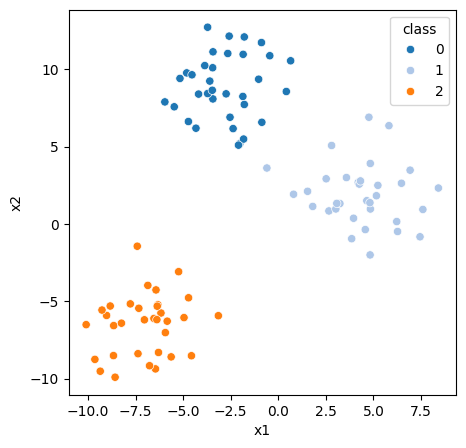

In [26]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'class', data = df, legend = 'full', palette = 'tab20')

# Algorithm


## Step 1
Randomly pick 𝒌 data points as our initial Centroids.

In [30]:
k = 3

# Step 1

idx = np.random.choice(len(X), k)
centroids = X[idx, :]
idx

array([63, 91, 21])

In [31]:
centroids

array([[ 0.80233641,  1.92014193],
       [ 6.92552447,  3.47703575],
       [-7.03383061, -6.19780564]])

## Step 2
Find the distance between each data points in our training set with the 𝒌 centroids.


In [32]:
from scipy.spatial.distance import cdist

# Step 2
distances = cdist(XA = X, XB= centroids, metric='euclidean') #cdist(XA=donde esta lo que quieres medir, XB=lo que quieres medir, metric=como lo quieres medir, euclidean es la default)
distances[0:5]

array([[15.09465399, 20.47970686,  4.01853646],
       [ 5.9718875 ,  4.01991418, 14.47429741],
       [ 9.21775288, 12.30726768, 16.68700829],
       [ 7.19009038,  4.33883446, 15.44207545],
       [10.36787049, 16.01976572,  0.97440641]])

## Step 3
Now assign each data point to the closest centroid

In [33]:
# Step 3
points = np.argmin(distances, axis=1)
points

array([2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0], dtype=int64)

## Step 4
Update centroid location by taking the average of the points in each cluster group.


In [34]:
# Step 4
temp_centroids = []

for cluster in range(k):
    # Update
    temp_cluster_centroid = np.mean(X[points==cluster], axis =0)
    temp_centroids.append(temp_cluster_centroid)

temp_centroids = np.array(temp_centroids)
temp_centroids

array([[-1.11134821,  6.58008387],
       [ 5.67832075,  2.30977875],
       [-7.02379204, -6.47232379]])

# Step 5
Centroid change? Convergence

In [35]:
centroids, temp_centroids

(array([[ 0.80233641,  1.92014193],
        [ 6.92552447,  3.47703575],
        [-7.03383061, -6.19780564]]),
 array([[-1.11134821,  6.58008387],
        [ 5.67832075,  2.30977875],
        [-7.02379204, -6.47232379]]))

In [37]:
# Step 5
if ( (centroids == temp_centroids).all() ):
    print("Done")
else:
    print("Not Done")
    centroids = temp_centroids

Done


# All together

In [38]:
def kmeans(X, k):
    
    # Step 1
    idx = np.random.choice(len(X), k)
    centroids = X[idx, :]
    
    while True:
        distances = cdist(XA = X, XB= centroids, metric='euclidean')

        # Step 3
        points = np.argmin(distances, axis=1)

        # Step 4
        temp_centroids = []

        for cluster in range(k):
            # Update
            temp_cluster_centroid = np.mean(X[points==cluster], axis =0)
            temp_centroids.append(temp_cluster_centroid)

        temp_centroids = np.array(temp_centroids)

        # Step 5
        if ( (centroids == temp_centroids).all() ):
            # Done
            return points, centroids

        else:
            centroids = temp_centroids

In [39]:
k = 3
points, centroids = kmeans(X, k)

In [40]:
centroids

array([[-7.02379204, -6.47232379],
       [ 4.35914117,  1.90467057],
       [-2.82641022,  8.85723525]])

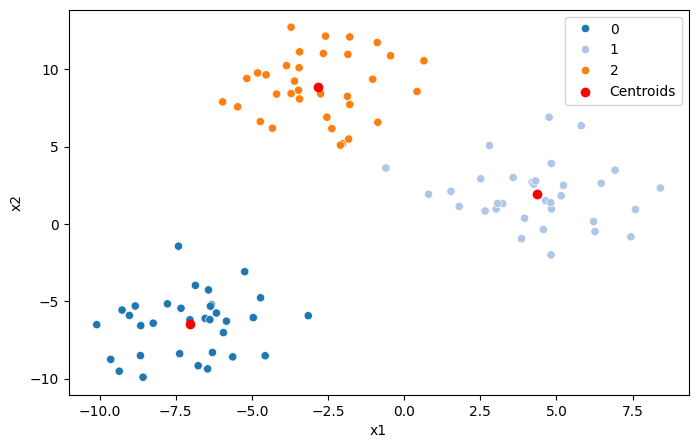

In [41]:
df = pd.DataFrame()
df['cluster'] = points
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]

# plot
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'cluster', data = df, legend = 'full', palette = 'tab20')
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'r', label = 'Centroids')
plt.legend()

# The Elbow Method + Sklearn

In [52]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters = k, random_state  = 42).fit(X)

In [53]:
print("Points: ", kmeans.labels_)
print("Centroids: ", kmeans.cluster_centers_[0])

Points:  [1 2 0 2 1 2 0 2 2 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 2 1 1 1 1 2 2 1 0 0 0
 0 2 2 1 0 2 0 0 2 1 1 1 2 2 2 0 1 1 1 0 0 2 0 1 2 1 2 1 1 2 1 2 2 2 1 1 0
 2 1 2 1 2 2 0 2 0 1 0 0 0 2 0 2 2 2 0 2 0 0 0 2 1 0]
Centroids:  [-2.82641022  8.85723525]


In [54]:
print("Score: ", kmeans.inertia_)
print("Score: ", kmeans.score(X))

Score:  687.6439383623091
Score:  -687.6439383623091


In [55]:
wcss = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, random_state  = 42).fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method

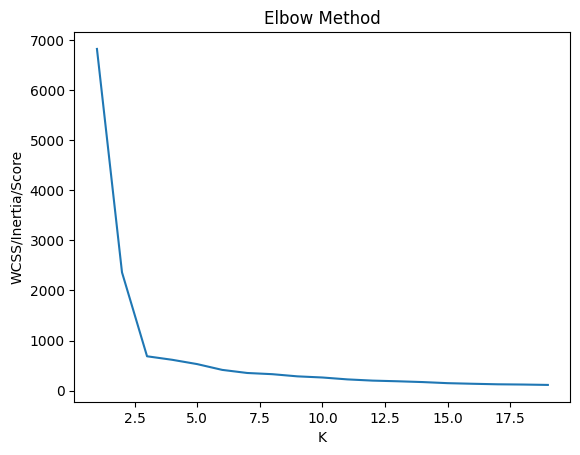

In [56]:
plt.plot(range(1, 20), wcss)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS/Inertia/Score")
plt.show()